In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

averaged_result_df = pd.read_csv('/home/lgierz/BA_MothClassification/data/combined_results/cv_bestparams_alldatasets_180runs_averaged.csv')

import json
import os


plt.rc('font', size=12)  # Set default font size for all elements
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # X and Y labels font size
plt.rc('xtick', labelsize=12)  # X tick labels font size
plt.rc('ytick', labelsize=12)  # Y tick labels font size
plt.rc('legend', fontsize=10)  # Legend font size
plt.rc('figure', titlesize=12)  # Figure title font size

### Impact of Amount of Species

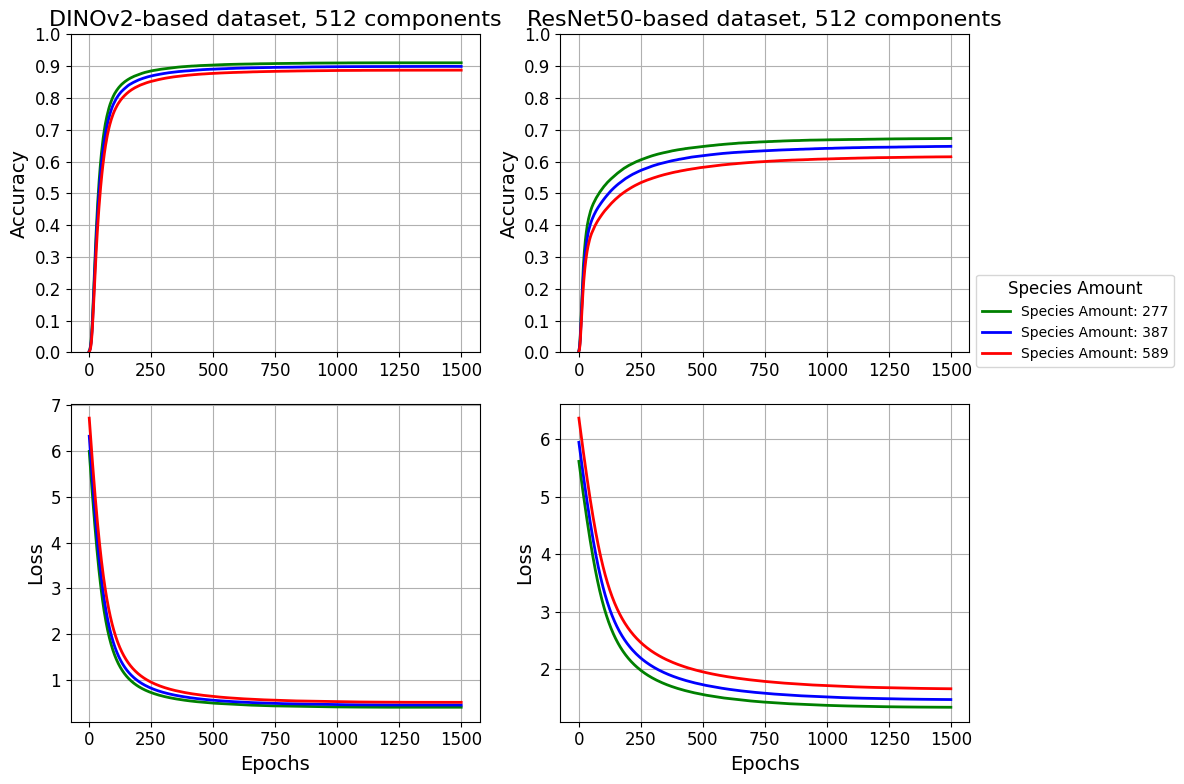

In [13]:
dino_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'DINOv2') & (averaged_result_df['Model'] == 'Linear Classifier')]
resnet_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'ResNet50') & (averaged_result_df['Model'] == 'Linear Classifier')]

# Define colors for the species amounts
species_colors = {
    277: 'green',
    387: 'blue',
    589: 'red'
}

# Create the plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy for DINO
for i, row in dino_df[dino_df['SampleAmount'] == 1000].iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax1.plot(epochs, epoch_accuracies, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot loss for DINO
for i, row in dino_df[dino_df['SampleAmount'] == 1000].iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax2.plot(epochs, epoch_losses, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot accuracy for ResNet50
for i, row in resnet_df[resnet_df['SampleAmount'] == 1000].iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax3.plot(epochs, epoch_accuracies, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot loss for ResNet50
for i, row in resnet_df[resnet_df['SampleAmount'] == 1000].iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax4.plot(epochs, epoch_losses, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Labels and title for DINO
ax1.set_title('DINOv2-based dataset, 512 components')
ax1.set_ylabel('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Labels and title for ResNet50
ax3.set_title('ResNet50-based dataset, 512 components')
ax3.set_ylabel('Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

# Set y-axis limits and grid for accuracy plots
ax1.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax1.grid(True)
ax3.grid(True)
ax1.set_yticks(np.arange(0, 1.05, 0.1))
ax3.set_yticks(np.arange(0, 1.05, 0.1))

# Set grid for loss plots
ax2.grid(True)
ax4.grid(True)

# Add legend
ax3.legend(title='Species Amount', loc='center left', bbox_to_anchor=(1.0, 0.1))

plt.tight_layout()
plt.show()

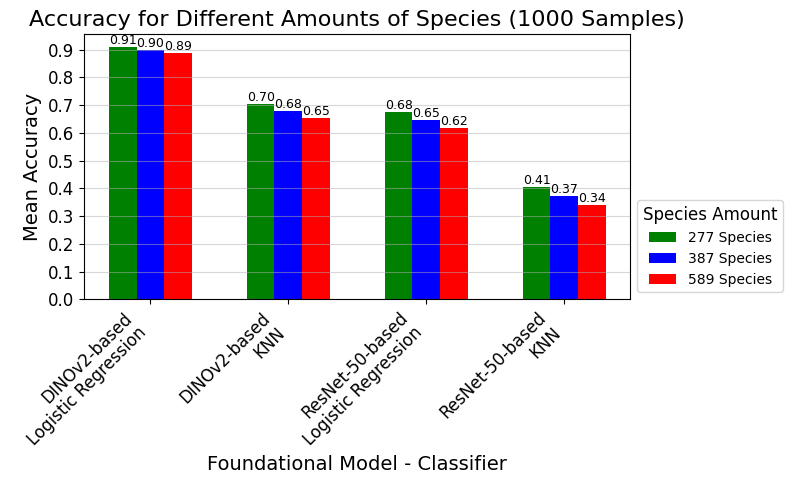

In [14]:
# Filter the dataframe for the sample amount of 1000
filtered_df = averaged_result_df[averaged_result_df['SampleAmount'] == 1000]

# Define colors for the species amounts
species_colors = {
    277: 'green',
    387: 'blue',
    589: 'red'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define the width of each bar
bar_width = 0.2

# Get unique species amounts and models
species_amounts = filtered_df['SpeciesAmount'].unique()
models = ['Linear Classifier', 'KNN']
foundational_models = ['DINOv2', 'ResNet50']

# Calculate the positions for each bar
positions = np.arange(len(foundational_models) * len(models))

# Plot bars for each combination of foundational model and classifier
for i, species_amount in enumerate(species_amounts):
    subset = filtered_df[filtered_df['SpeciesAmount'] == species_amount]
    for j, model in enumerate(models):
        for k, fm in enumerate(foundational_models):
            label = f'{fm} - {model}'
            subset_model = subset[(subset['FoundationalModel'] == fm) & (subset['Model'] == model)]
            bar_position = positions[k * len(models) + j] + i * bar_width
            bar = ax.bar(bar_position, subset_model['Mean Accuracy'].values[0], bar_width, color=species_colors[species_amount], label=f'{species_amount} Species' if j == 0 and k == 0 else "")
            # Add text on top of each bar
            ax.text(bar_position, subset_model['Mean Accuracy'].values[0], f'{subset_model["Mean Accuracy"].values[0]:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Foundational Model - Classifier')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy for Different Amounts of Species (1000 Samples)')
ax.set_xticks(positions + bar_width)
ax.set_xticklabels([f"{fm if fm == 'DINOv2' else 'ResNet-50'}-based\n{model if model == 'KNN' else 'Logistic Regression'}" for fm in foundational_models for model in models], rotation=45, ha='right')
ax.legend(title='Species Amount', bbox_to_anchor=(1.0, 0.4))

# Add horizontal grid with a step of 0.1 accuracy
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


### Impact of Amount of Samples per Species

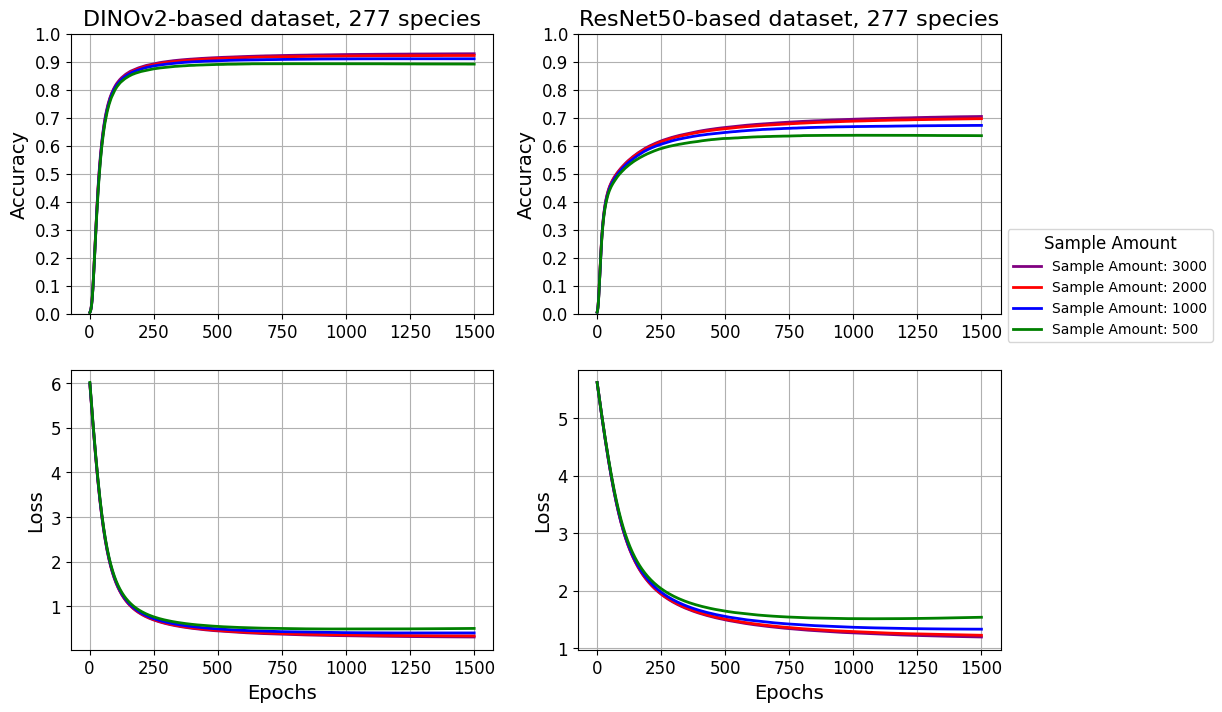

In [ ]:
dino_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'DINOv2') & 
                             (averaged_result_df['Model'] == 'Linear Classifier') & 
                             (averaged_result_df['SpeciesAmount'] == 277)]
resnet_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'ResNet50') & 
                               (averaged_result_df['Model'] == 'Linear Classifier') & 
                               (averaged_result_df['SpeciesAmount'] == 277)]

# Define colors for the sample amounts
sample_colors = {
    500: 'green',
    1000: 'blue',
    2000: 'red',
    3000: 'purple'
}

# Create the plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy for DINO
for i, row in dino_df.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax1.plot(epochs, epoch_accuracies, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot loss for DINO
for i, row in dino_df.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax2.plot(epochs, epoch_losses, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot accuracy for ResNet50
for i, row in resnet_df.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax3.plot(epochs, epoch_accuracies, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot loss for ResNet50
for i, row in resnet_df.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax4.plot(epochs, epoch_losses, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Labels and title for DINO
ax1.set_title('DINOv2-based dataset, 277 species')
ax1.set_ylabel('Validation Accuracy (in %)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Labels and title for ResNet50
ax3.set_title('ResNet50-based dataset, 277 species')
ax3.set_ylabel(' Validation Accuracy (in %)')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

# Set y-axis limits and grid for accuracy plots
ax1.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax1.grid(True)
ax3.grid(True)
ax1.set_yticks(np.arange(0, 1.05, 0.1))
ax3.set_yticks(np.arange(0, 1.05, 0.1))

# Set grid for loss plots
ax2.grid(True)
ax4.grid(True)

# Add legend
ax3.legend(title='Sample Amount', loc='center left', bbox_to_anchor=(1.0, 0.1))

plt.tight_layout()
plt.show()

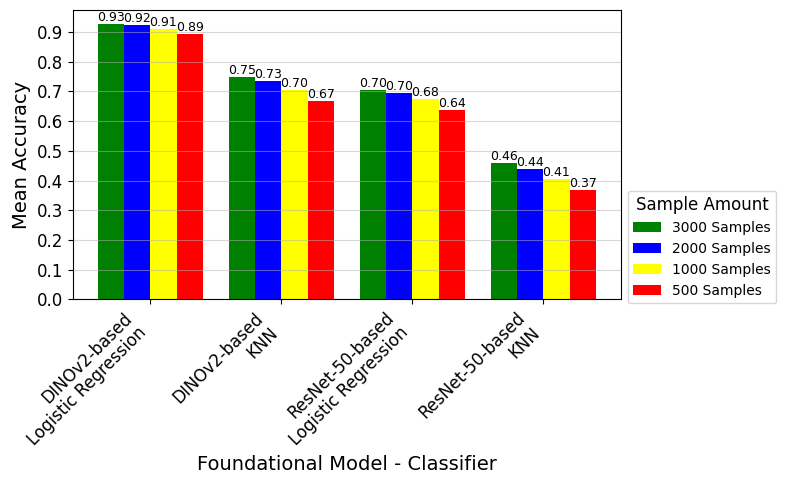

In [16]:
# Filter the dataframe for the species amount of 277
filtered_df = averaged_result_df[averaged_result_df['SpeciesAmount'] == 277]

# Define colors for the sample amounts
sample_colors = {
    500: 'red',
    1000: 'yellow',
    2000: 'blue',
    3000: 'green'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define the width of each bar
bar_width = 0.2

# Get unique sample amounts and models
sample_amounts = filtered_df['SampleAmount'].unique()
models = ['Linear Classifier', 'KNN']
foundational_models = ['DINOv2', 'ResNet50']

# Calculate the positions for each bar
positions = np.arange(len(foundational_models) * len(models))

# Plot bars for each combination of foundational model and classifier
for i, sample_amount in enumerate(sample_amounts):
    subset = filtered_df[filtered_df['SampleAmount'] == sample_amount]
    for j, model in enumerate(models):
        for k, fm in enumerate(foundational_models):
            label = f'{fm} - {model}'
            subset_model = subset[(subset['FoundationalModel'] == fm) & (subset['Model'] == model)]
            bar_position = positions[k * len(models) + j] + i * bar_width
            bar = ax.bar(bar_position, subset_model['Mean Accuracy'].values[0], bar_width, color=sample_colors[sample_amount], label=f'{sample_amount} Samples' if j == 0 and k == 0 else "")
            # Add text on top of each bar
            ax.text(bar_position, subset_model['Mean Accuracy'].values[0], f'{subset_model["Mean Accuracy"].values[0]:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Foundational Model - Classifier')
ax.set_ylabel('Mean Accuracy')
#ax.set_title('Accuracy for Different Amounts of Samples (277 Species)')
ax.set_xticks(positions + (len(sample_amounts) - 1) * bar_width / 2)
ax.set_xticklabels([f"{fm if fm=='DINOv2' else 'ResNet-50'}-based\n{model if model == 'KNN' else 'Logistic Regression'}" for fm in foundational_models for model in models], rotation=45, ha='right')
ax.legend(title='Sample Amount', bbox_to_anchor=(1.0, 0.4))

# Add horizontal grid with a step of 0.1 accuracy
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


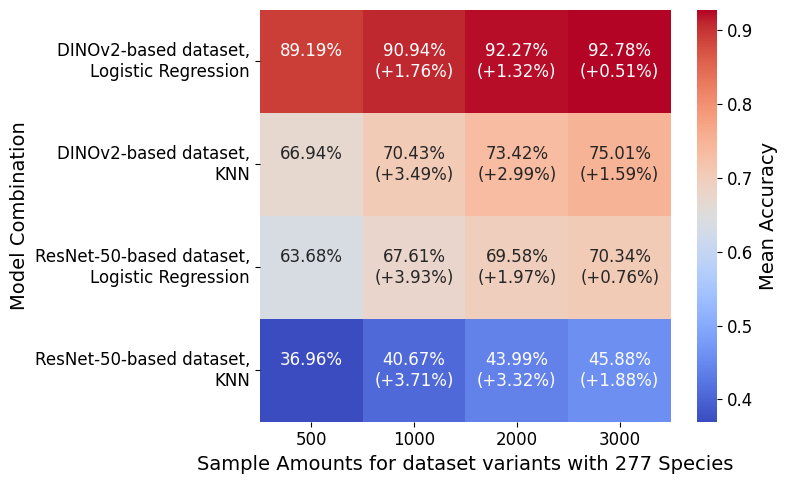

In [39]:
import seaborn as sns

# Filter the dataframe for SpeciesAmount=277
filtered_df = averaged_result_df[averaged_result_df['SpeciesAmount'] == 277]

# Pivot the dataframe to get the accuracy values for the heatmap
pivot_df = filtered_df.pivot_table(index=['FoundationalModel', 'Model'], columns='SampleAmount', values='Mean Accuracy')

# Sort the dataframe according to the specified order
order = [('DINOv2', 'Linear Classifier'), ('DINOv2', 'KNN'), ('ResNet50', 'Linear Classifier'), ('ResNet50', 'KNN')]
pivot_df = pivot_df.reindex(order)

# Calculate the gap between each accuracy and the previous one
gap_df = pivot_df.diff(axis=1)

# Create a new dataframe to store both accuracy and gap
heatmap_data = pivot_df.applymap(lambda x: f'{x:.2%}') + '\n' + gap_df.applymap(lambda x: f'(+{x:.2%})' if pd.notna(x) else '').fillna('')

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_df, annot=heatmap_data, fmt='', cmap='coolwarm', cbar_kws={'label': 'Mean Accuracy'})

# Customize the plot
plt.xlabel('Sample Amounts for dataset variants with 277 Species')
plt.ylabel('Model Combination')
plt.xticks()
plt.yticks(ticks=np.arange(len(order)) + 0.5, labels=["DINOv2-based dataset,\nLogistic Regression", "DINOv2-based dataset,\nKNN", "ResNet-50-based dataset,\nLogistic Regression", "ResNet-50-based dataset,\nKNN"], rotation=0)

plt.tight_layout()
plt.show()


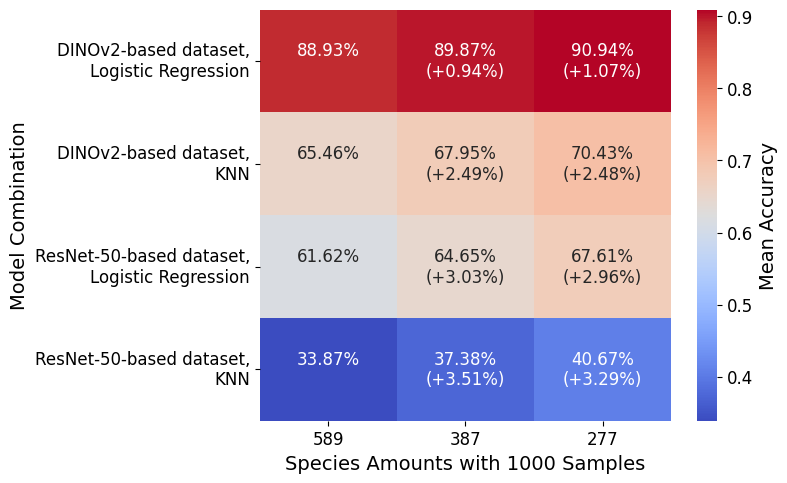

In [46]:
import seaborn as sns

# Filter the dataframe for SampleAmount=1000
filtered_df = averaged_result_df[averaged_result_df['SampleAmount'] == 1000]

# Pivot the dataframe to get the accuracy values for the heatmap
pivot_df = filtered_df.pivot_table(index=['FoundationalModel', 'Model'], columns='SpeciesAmount', values='Mean Accuracy')

# Sort the dataframe according to the specified order
order = [('DINOv2', 'Linear Classifier'), ('DINOv2', 'KNN'), ('ResNet50', 'Linear Classifier'), ('ResNet50', 'KNN')]
pivot_df = pivot_df.reindex(order)

# Reorder the columns to have 589 first and 277 at the end
pivot_df = pivot_df[[589, 387, 277]]

# Calculate the gap between each accuracy and the previous one
gap_df = pivot_df.diff(axis=1)

# Create a new dataframe to store both accuracy and gap
heatmap_data = pivot_df.applymap(lambda x: f'{x:.2%}') + '\n' + gap_df.applymap(lambda x: f'(+{x:.2%})' if pd.notna(x) else '').fillna('')

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_df, annot=heatmap_data, fmt='', cmap='coolwarm', cbar_kws={'label': 'Mean Accuracy'})

# Customize the plot
plt.xlabel('Species Amounts with 1000 Samples')
plt.ylabel('Model Combination')
plt.xticks()
plt.yticks(ticks=np.arange(len(order)) + 0.5, labels=["DINOv2-based dataset,\nLogistic Regression", "DINOv2-based dataset,\nKNN", "ResNet-50-based dataset,\nLogistic Regression", "ResNet-50-based dataset,\nKNN"], rotation=0)

plt.tight_layout()
plt.show()
